# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [130]:
# Checking the number of mice.
combined_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [131]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

clean_data=combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep=False)

In [132]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes=pd.concat(x for _, x in combined_data.groupby(["Mouse ID","Timepoint"]) if len(x) > 1)
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [133]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [134]:
# Checking the number of mice in the clean DataFrame.
clean_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1636
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().to_frame()
median=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().to_frame()
variance=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().to_frame()
stdev=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().to_frame()
sem=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().to_frame()
dataframes = [mean,median,variance,stdev,sem]
summary_df = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), dataframes)
summary_df.columns= ["Mean Tumor Volume", "Median Tumor Volume", "Variance in Tumor Volume", "St. Dev. of Tumor Volume", "SEM"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,St. Dev. of Tumor Volume,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,151
Ramicane,228
Stelasyn,181


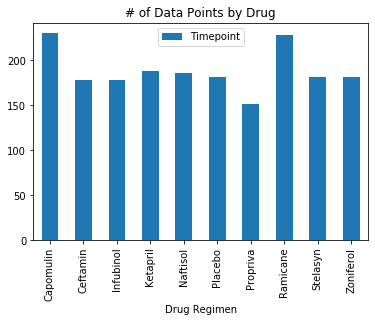

In [188]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints=clean_data.groupby("Drug Regimen")["Timepoint"].count().to_frame()
timepoints.plot(kind="bar",title="# of Data Points by Drug")
timepoints

Text(0, 0.5, '# of data points')

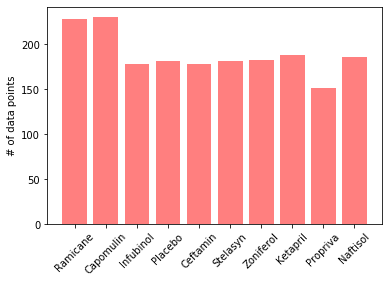

In [247]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


druglist=pd.unique(clean_data['Drug Regimen'])
timepointslist=[]
for drug in druglist:
    timepoint=timepoints.loc[drug,"Timepoint"]
    timepointslist.append(timepoint)
plt.bar(druglist, timepointslist, color='r', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.ylabel("# of data points")

,Sex
Sex,
Female,925
Male,958


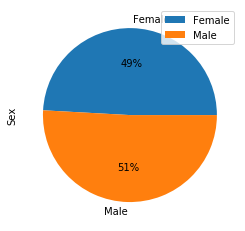

In [243]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df=clean_data.groupby("Sex")["Sex"].count().to_frame()
sex_df.plot(kind="pie",autopct="%1.0f%%",subplots=True)
sex_df

([<matplotlib.patches.Wedge at 0x7fee57b7a2d0>,
 [Text(-0.7299924150353834, -0.8228675920163636, 'Female'),
  Text(0.7299924150353835, 0.8228675920163635, 'Male')],
 [Text(-0.3981776809283909, -0.4488368683725619, '49.1%'),
  Text(0.39817768092839095, 0.44883686837256187, '50.9%')])

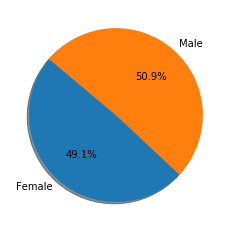

In [249]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes=["Female", "Male"]
counts=[925,958]
plt.pie(counts, labels=sexes,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [272]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
important_drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df=clean_data[(clean_data["Drug Regimen"]=="Capomulin")|(clean_data["Drug Regimen"]=="Ramicane")|(clean_data["Drug Regimen"]=="Infubinol")|(clean_data["Drug Regimen"]=="Ceftamin")]
final_df=clean_data.groupby("Mouse ID")["Timepoint"].max().to_frame()
# Start by getting the last (greatest) timepoint for each mouse
merged_df=pd.merge(filtered_df, final_df, on=["Mouse ID","Timepoint"])
merged_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


---------------------------/nDrug: Capomulin
The interquartile range of final tumor sizes is: Final Tumor Size    7.781863
dtype: float64
Values below Final Tumor Size    20.704562
dtype: float64 could be outliers.
Values above Final Tumor Size    51.832015
dtype: float64 could be outliers.


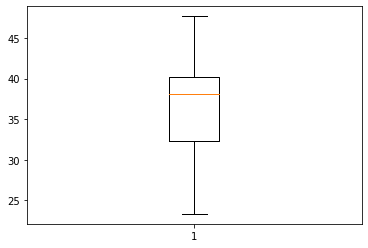

---------------------------/nDrug: Ramicane
The interquartile range of final tumor sizes is: Final Tumor Size    9.098537
dtype: float64
Values below Final Tumor Size    17.912664
dtype: float64 could be outliers.
Values above Final Tumor Size    54.306811
dtype: float64 could be outliers.


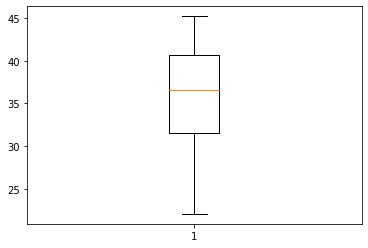

---------------------------/nDrug: Infubinol
The interquartile range of final tumor sizes is: Final Tumor Size    11.477135
dtype: float64
Values below Final Tumor Size    36.832905
dtype: float64 could be outliers.
Values above Final Tumor Size    82.741446
dtype: float64 could be outliers.


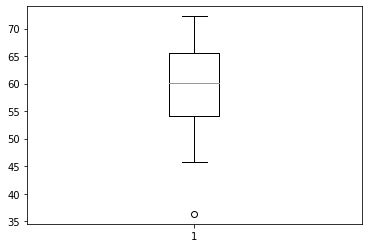

---------------------------/nDrug: Ceftamin
The interquartile range of final tumor sizes is: Final Tumor Size    15.577752
dtype: float64
Values below Final Tumor Size    25.35545
dtype: float64 could be outliers.
Values above Final Tumor Size    87.666458
dtype: float64 could be outliers.


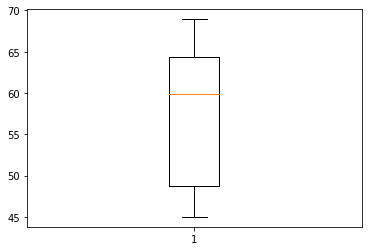

In [309]:
# Put treatments into a list for for loop (and later for plot labels)
important_drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#Capomulin=[]
#Ramicane=[]
#Infubinol=[]
#Ceftamin=[]
tumorVols=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for x in range(0,len(merged_df)):
 #   if merged_df.iloc[x,2]=="Capomulin":
  #      Capomulin.append(merged_df.iloc[x,7])
   # elif merged_df.iloc[x,2]=="Ramicane":
    #    Ramicane.append(merged_df.iloc[x,7])
    #elif merged_df.iloc[x,2]=="Infubinol":
     #   Infubinol.append(merged_df.iloc[x,7])
    #elif merged_df.iloc[x,2]=="Ceftamin":
     #   Ceftamin.append(merged_df.iloc[x,7])
for drug in important_drugs:
    for x in range(0,len(merged_df)):
        if merged_df.iloc[x,1]==drug:
            tumorVols.append(merged_df.iloc[x,6])
    drug_df = pd.DataFrame(tumorVols, columns = ['Final Tumor Size'])
    drug_df.head()
    lowerq = drug_df.quantile(.25)
    upperq = drug_df.quantile(.75)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"---------------------------/nDrug: {drug}")
    print(f"The interquartile range of final tumor sizes is: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    
    fig1, ax1 = plt.subplots()
    ax1.boxplot(tumorVols)
    plt.show()
    drug_df = drug_df.iloc[0:0]
    tumorVols=[]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

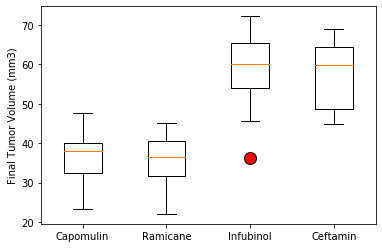

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

##ABOVE

## Line and Scatter Plots

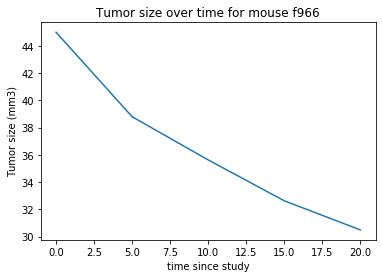

In [324]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time=[]
tumorVol=[]
for x in range(0,len(clean_data)):
        if clean_data.iloc[x,0]=="f966":
            tumorVol.append(clean_data.iloc[x,6])
            time.append(clean_data.iloc[x,5])
plt.plot(time,tumorVol)
plt.title("Tumor size over time for mouse f966")
plt.ylabel("Tumor size (mm3)")
plt.xlabel("time since study")
plt.show()

Text(0, 0.5, 'Average tumor volume')

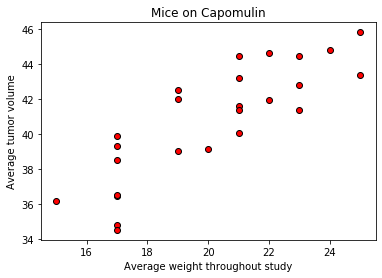

In [341]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
filtered_df=clean_data[(clean_data["Drug Regimen"]=="Capomulin")]
meanWeight=filtered_df.groupby("Mouse ID")["Weight (g)"].mean().tolist()
avgVol=filtered_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().tolist()
plt.scatter(meanWeight, avgVol, marker="o", facecolors="red", edgecolors="black")
plt.title("Mice on Capomulin")
plt.xlabel("Average weight throughout study")
plt.ylabel("Average tumor volume")


## Correlation and Regression

In [340]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(meanWeight,avgVol)
plt.plot(meanWeight,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Avg. Weight throughout study')
plt.ylabel('Avg. Tumor size throughout study')
plt.title("With trendline")
print(f"R value: {rvalue}")
plt.show()

TypeError: can only concatenate list (not "int") to list